# Preliminaries


## Environment setup

In [1]:
import os

from paths import (
    annotation_file,
    dataset_dir,
    log_mel_spec_dir,
    root_path,
    taxonomy_file,
    ust_data_dir,
)

## The SONYC Urban Sound Tagging Dataset

The SONYC-UST dataset was released along with the following paper, that you should read:

> Cartwright, M., Mendez, A.E.M., Cramer, J., Lostanlen, V., Dove, G., Wu, H., Salamon, J., Nov, O., Bello, J.P. SONYC Urban Sound Tagging (SONYC-UST): A Multilabel Dataset from an Urban Acoustic Sensor Network. In Proceedings of the Workshop on Detection and Classification of Acoustic Scenes and Events (DCASE) , 2019. [PDF](https://dcase.community/documents/workshop2019/proceedings/DCASE2019Workshop_Cartwright_4.pdf)

### Description

SONYC Urban Sound Tagging (SONYC-UST) is a dataset for the development and evaluation of machine listening systems for realistic urban noise monitoring. The audio was recorded from the [SONYC](https://wp.nyu.edu/sonyc) acoustic sensor network. Volunteers on the  [Zooniverse](https://zooniverse.org) citizen science platform tagged the presence of 23 classes that were chosen in consultation with the New York City Department of Environmental Protection. These 23 fine-grained classes can be grouped into 8 coarse-grained classes. The recordings are split into three sets: training, validation, and testing. The training and validation sets are disjoint with respect to the sensor from which each recording came, and the testing set is displaced in time. For increased reliability, three volunteers annotated each recording, and members of the SONYC team subsequently created a set of ground-truth tags for the validation set using a two-stage annotation procedure in which two annotators independently tagged and then collectively resolved any disagreements.





### Audio data
The provided audio has been acquired using the SONYC acoustic sensor network for urban noise pollution monitoring. Over 50 different sensors have been deployed in New York City, and these sensors have collectively gathered the equivalent of 37 years of audio data, of which SONYC provides a small subset. The data was sampled by selecting the nearest neighbors on [VGGish](https://github.com/tensorflow/models/tree/master/research/audioset) features of recordings known to have classes of interest. All recordings are 10 seconds and were recorded with identical microphones at identical gain settings. To maintain privacy, the recordings in this release have been distributed in time and location, and the time and location of the recordings are not included in the metadata.



### Label taxonomy
The label taxonomy is as follows:


1. engine

    1: small-sounding-engine
    
    2: medium-sounding-engine
    
    3: large-sounding-engine
    
    X: engine-of-uncertain-size
    
2. machinery-impact

    1: rock-drill
    
    2: jackhammer
    
    3: hoe-ram
    
    4: pile-driver
    
    X: other-unknown-impact-machinery
    
3. non-machinery-impact

    1: non-machinery-impact
    
4. powered-saw

    1: chainsaw
    
    2: small-medium-rotating-saw
    
    3: large-rotating-saw
    
    X: other-unknown-powered-saw
    
5. alert-signal

    1: car-horn
    
    2: car-alarm
    
    3: siren
    
    4: reverse-beeper
    
    X: other-unknown-alert-signal
    
6. music

    1: stationary-music
    
    2: mobile-music
    
    3: ice-cream-truck
    
    X: music-from-uncertain-source
    
7. human-voice

    1: person-or-small-group-talking
    
    2: person-or-small-group-shouting
    
    3: large-crowd
    
    4: amplified-speech
    
    X: other-unknown-human-voice
    
8. dog

    1: dog-barking-whining

The classes preceded by an `X` code indicate when an annotator was able to identify the coarse class, but couldn't identify the fine class because either they were uncertain which fine class it was or the fine class was not included in the taxonomy. `dcase-ust-taxonomy.yaml` contains this taxonomy in an easily machine-readable form.

**In this project, we are only interested in the 8 coarse-grained labels.**


### Data splits

This release contains a training subset (2351 recordings), and validation subset (443 recordings), and a test subset (274 recordings). The training and validation subsets are disjoint with respect to the sensor from which each recording came, and were chosen such that the distribution of citizen science provided labels were similar for each split. The sensors in the test set are not disjoint from the training and validation subsets, but the test recordings are displaced in time, occurring after any of the recordings in the training and validation subset.

During the development stage of your model, you **must** only use the training and validation set of the SONYC-UST dataset. You should **never** use the test set to tune the parameters or hyperparameters of your system.



### Annotation data

The annotation data are contained in `annotations.csv`. Each row in the file represents one multi-label annotation of a recording---it could be the annotation of a single citizen science volunteer, a single SONYC team member, or the agreed-upon ground truth by the SONYC team (see the annotator_id column description for more information).

#### Columns

*split*
: The data split.

*sensor_id*
: The ID of the sensor the recording is from. These have been anonymized to have no relation to geolocation.

*audio_filename*
: The filename of the audio recording

*annotator_id*
: The anonymous ID of the annotator. If this values is positive, it is a citizen science volunteer from the Zooniverse platform. If it is negative, it is a SONYC team member (only present for validation set). If it is 0, then it is the ground truth agreed-upon by the SONYC team.

*(coarse_id)-(fine_id)\_(fine_name)_presence*
: Columns of this form indicate the presence of fine-level class. `1` if present, `0` if not present. If `-1`, then the class wasn't labeled in this annotation because the annotation was performed by a SONYC team member who only annotated one coarse group of classes at a time when annotating the validation set.

*(coarse_id)\_(coarse_name)_presence*
: Columns of this form indicate the presence of a coarse-level class. `1` if present, `0` if not present. If `-1`, then the class wasn't labeled in this annotation because the annotation was performed by a SONYC team member who only annotated one coarse group of classes at a time when annotating the validation set. These columns are computed from the fine-level class presence columns and are presented here for convenience when training on only coarse-level classes.

*(coarse_id)-(fine_id)\_(fine_name)_proximity*
: Columns of this form indicate the proximity of a fine-level class. After indicating the presence of a fine-level class, citizen science annotators were asked to indicate the proximity of the sound event to the sensor. Only the citizen science volunteers performed this task, and therefore this data is included for training but not validation. This columns can take on four values: (`near`, `far`, `notsure`, `-1`). If `-1`, then the proximity was not annotated because either the annotation wasn't performed by a citizen science volunteer, or the citizen science volunteer did not indicate the presence of the class.

### Conditions of use

Dataset created by Mark Cartwright (1,2,3), Ana Elisa Mendez Mendez (1), Graham Dove (2), Jason Cramer (1), Vincent Lostanlen (1,2,4), Ho-Hsiang Wu (1), Justin Salamon (1,5), Oded Nov (6), Juan Pablo Bello (1,2,3)

1. Music and Audio Resarch Lab, New York University
2. Center for Urban Science and Progress, New York University
3. Department of Computer Science and Engineering, New York University
4. Cornell Lab of Ornithology
5. Adobe Research
6. Department of Technology Management and Innovation, New York University

The SONYC-UST dataset is offered free of charge under the terms of the Creative  Commons Attribution 4.0 International (CC BY 4.0) license:
https://creativecommons.org/licenses/by/4.0/

## Exploring the dataset

We will use [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to manipulate the dataset.

In [2]:
import numpy as np
import oyaml as yaml
import pandas as pd
from utils import get_file_targets, get_subset_split

In [3]:
# Create a Pandas DataFrame from the annotation CSV file
annotation_data = pd.read_csv(annotation_file).sort_values("audio_filename")

# You can view the top rows of the frame with
annotation_data.head()

,split,sensor_id,audio_filename,annotator_id,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,2-1_rock-drill_presence,2-2_jackhammer_presence,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,validate,0,00_000066.wav,95,1.0,1.0,1.0,1.0,1.0,1.0,...,far,far,1,1,1,1,1,1,1,1
9708,validate,0,00_000066.wav,-1,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
8515,validate,0,00_000066.wav,-5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9277,validate,0,00_000066.wav,-2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
9276,validate,0,00_000066.wav,-3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,0,-1


In [4]:
# List of all audio files
file_list = annotation_data["audio_filename"].unique().tolist()

In [5]:
# Load taxonomy
with open(taxonomy_file, "r") as f:
    taxonomy = yaml.load(f, Loader=yaml.Loader)

# get list of labels from taxonomy
labels = ["_".join([str(k), v]) for k, v in taxonomy["coarse"].items()]

# number of classes
n_classes = len(labels)

print(labels)

['1_engine', '2_machinery-impact', '3_non-machinery-impact', '4_powered-saw', '5_alert-signal', '6_music', '7_human-voice', '8_dog']


In [6]:
# get list of one-hot encoded labels for all audio files
target_list = get_file_targets(annotation_data, labels)

# get list of idices for the training, validation and test subsets
train_file_idxs, val_file_idxs, test_file_idxs = get_subset_split(annotation_data)

For each split (training, validation) and each label, we compute the proportion of files that contain this label.

In [7]:
train_proportions = np.sum(target_list[train_file_idxs, :], axis=0) / len(
    train_file_idxs
)

val_proportions = np.sum(target_list[val_file_idxs, :], axis=0) / len(val_file_idxs)

test_proportions = np.sum(target_list[test_file_idxs, :], axis=0) / len(test_file_idxs)

print("Distribution of classes in the training set:")
for idx, label in enumerate(labels):
    print(label + ": {:.2%}".format(train_proportions[idx]))

print("\n")

print("Distribution of classes in the validation set:")
for idx, label in enumerate(labels):
    print(label + ": {:.2%}".format(val_proportions[idx]))

Distribution of classes in the training set:
1_engine: 53.98%
2_machinery-impact: 26.97%
3_non-machinery-impact: 11.74%
4_powered-saw: 10.38%
5_alert-signal: 23.35%
6_music: 5.32%
7_human-voice: 33.09%
8_dog: 6.42%


Distribution of classes in the validation set:
1_engine: 50.34%
2_machinery-impact: 3.61%
3_non-machinery-impact: 16.48%
4_powered-saw: 5.19%
5_alert-signal: 19.41%
6_music: 5.64%
7_human-voice: 44.92%
8_dog: 1.35%


## Audio basics

We will use three libraries for processing audio signals:


1.   [Librosa](https://librosa.github.io/librosa/index.html) is a Python package for music and audio processing.
2. [PySoundFile](https://pysoundfile.readthedocs.io/en/0.8.1) is an audio library based on libsndfile, CFFI and NumPy.
3.   [IPython.display.Audio](https://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio) lets you play audio directly in notebooks.



### Reading audio

Use [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) to load an audio file into an audio array. Return both the audio array as well as the sample rate:

In [8]:
import librosa

# get a file in the training set

training_file_list = [file_list[ind] for ind in train_file_idxs]
audio_file = os.path.join(dataset_dir, "audio-dev/train", training_file_list[10])
x, sr = librosa.load(audio_file, mono=True, sr=None)

Display the length of the audio array and sample rate:

In [9]:
print(x.shape)
print(sr)

(441000,)
44100


In [10]:
import resampy
import vggish_params

old_sr = sr
sr = vggish_params.SAMPLE_RATE

x = resampy.resample(x, old_sr, sr)

### Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands:

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'time (s)')

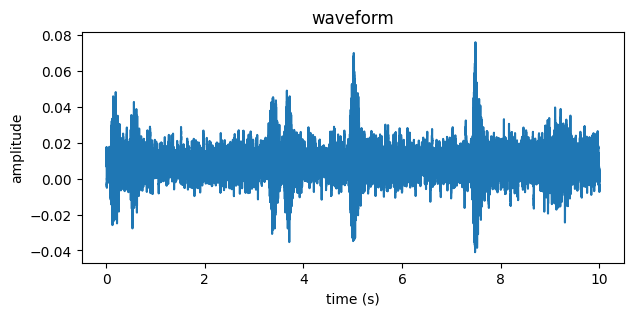

In [12]:
time_axis = np.arange(0, x.shape[0] / sr, 1 / sr)

plt.figure(figsize=(7, 3))
plt.plot(time_axis, x)
plt.title("waveform")
plt.ylabel("amplitude")
plt.xlabel("time (s)")

### Playing Audio

Using [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), you can play an audio file:

In [13]:
import IPython.display as ipd

ipd.Audio(x, rate=sr)  # load a local WAV file

### Writing Audio

[`soundfile.write`](https://pysoundfile.readthedocs.io/en/0.8.1/#soundfile.write) saves a NumPy array to a WAV file.

In [14]:
import soundfile as sf

sf.write("example.wav", x, sr)

## Mel spectrogram

In this project, we will work with a time-frequency representation of audio signals called the Mel spectrogram. It is computed as follows:

#### Framing

The waveform is converted into into a sequence of successive overlapping frames.

In [15]:
# Define the parameters of the short-term analysis
window_length_secs = vggish_params.STFT_WINDOW_LENGTH_SECONDS
hop_length_secs = vggish_params.STFT_HOP_LENGTH_SECONDS
window_length_samples = int(round(sr * window_length_secs))
hop_length_samples = int(round(sr * hop_length_secs))

num_samples = x.shape[0]

num_frames = 1 + int(
    np.floor((num_samples - window_length_samples) / hop_length_samples)
)


X_frames = np.zeros((window_length_samples, num_frames))
for n in np.arange(num_frames):
    beg = n * hop_length_samples
    end = beg + window_length_samples
    X_frames[:, n] = x[beg:end]

print(X_frames.shape)

# The following lines are equivalent but probably more efficient
# (this is what is implemented in VGGish recipe to compute the features)
#
# shape = (num_frames, window_length_samples)
# strides = (x.strides[0] * hop_length_samples,) + x.strides
# X_frames = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides).T

(400, 998)


#### Windowing

Each frame is multiplied with a smooth analysis window.

(400, 998)


Text(0.5, 0, 'samples')

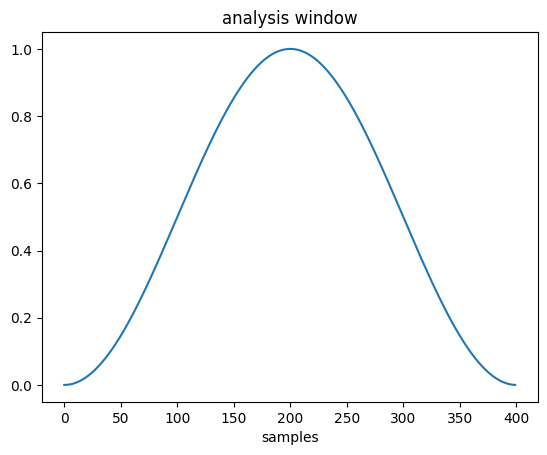

In [16]:
window = 0.5 - (
    0.5 * np.cos(2 * np.pi / window_length_samples * np.arange(window_length_samples))
)  # "periodic" Hann

X_windowed_frames = X_frames * window[:, np.newaxis]

plt.figure()
plt.plot(window)

print(X_windowed_frames.shape)
plt.title("analysis window")
plt.xlabel("samples")

#### Discrete Fourier transform

The short-term Fourier transform (STFT) is computed by applying the discrete Fourier transform (DFT) on each windowed frame. The magnitude spectrogram is obtained by taking the modulus of the STFT matrix.

Text(0, 0.5, 'frequency (Hz)')

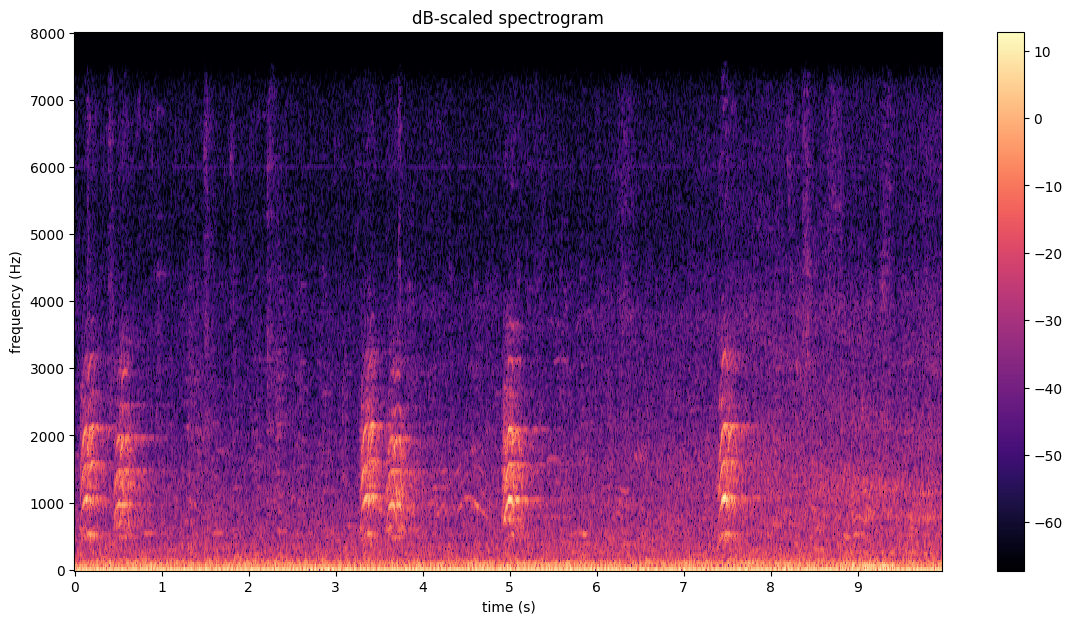

In [17]:
import librosa.display

fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))

X_stft = np.fft.rfft(X_windowed_frames, int(fft_length), axis=0)
X_spec = np.abs(X_stft)


plt.figure(figsize=(14, 7))
librosa.display.specshow(
    librosa.amplitude_to_db(X_spec),
    sr=sr,
    hop_length=hop_length_samples,
    x_axis="time",
    y_axis="hz",
)

# This is basically equivalent to:
# librosa.display.specshow(20*np.log10(X_spec), sr=sr,
#                          hop_length=hop_length_samples, x_axis='time',
#                          y_axis='hz')
# plt.clim(-60,25)

plt.colorbar()
plt.title("dB-scaled spectrogram")
plt.xlabel("time (s)")
plt.ylabel("frequency (Hz)")

#### Mel filterbank

A filterbank matrix is created to map DFT-frequency bins into Mel-frequency bins

(64, 257)


Text(0, 0.5, 'Mel-frequency bins')

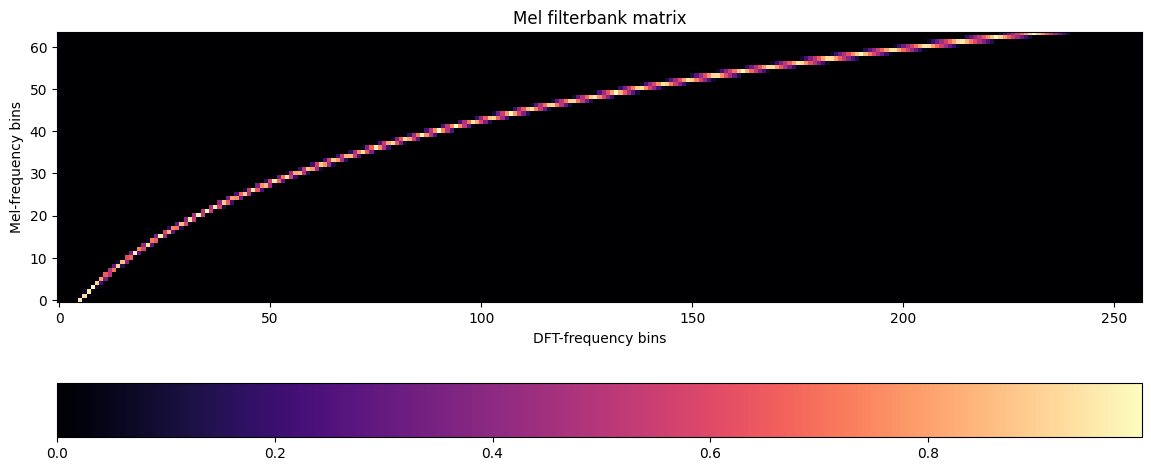

In [18]:
import mel_features

lower_edge_hertz = vggish_params.MEL_MIN_HZ
upper_edge_hertz = vggish_params.MEL_MAX_HZ
num_mel_bins = vggish_params.NUM_MEL_BINS


spec_to_mel_mat = mel_features.spectrogram_to_mel_matrix(
    num_mel_bins=num_mel_bins,
    num_spectrogram_bins=X_spec.shape[0],
    audio_sample_rate=sr,
    lower_edge_hertz=lower_edge_hertz,
    upper_edge_hertz=upper_edge_hertz,
)

print(spec_to_mel_mat.T.shape)

plt.figure(figsize=(14, 7))
plt.imshow(spec_to_mel_mat.T, origin="lower")
plt.colorbar(orientation="horizontal")
plt.set_cmap("magma")

plt.title("Mel filterbank matrix")
plt.xlabel("DFT-frequency bins")
plt.ylabel("Mel-frequency bins")

#### Mel spectrogram

The Mel spectrogram is obtained by mapping the spectrogram through the Mel filterbank, which simply corresponds to a matrix multiplication.

Text(0, 0.5, 'Mel-frequency bins')

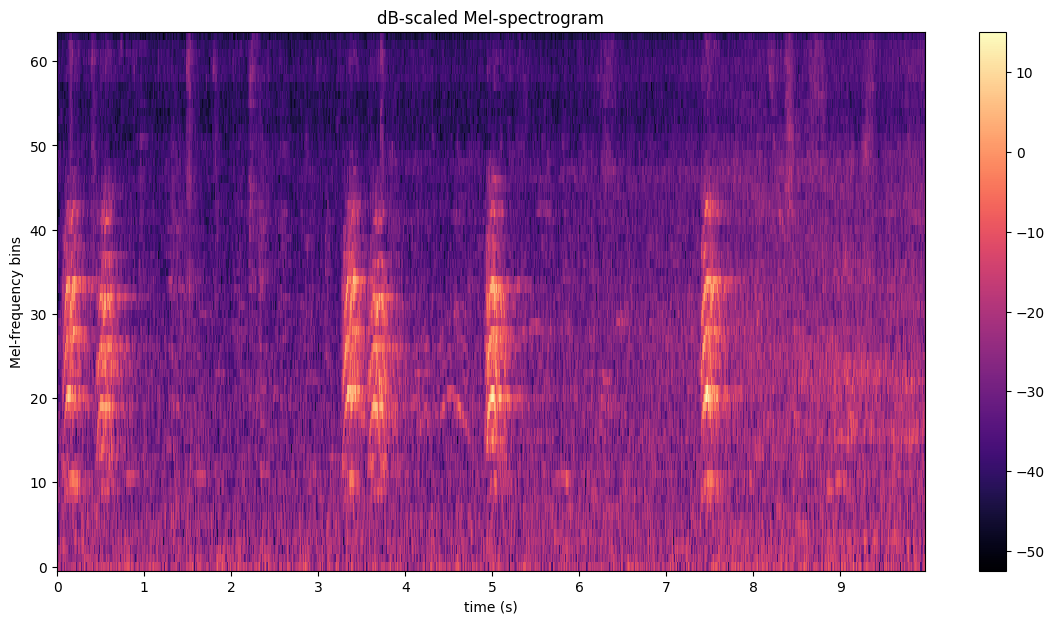

In [20]:
X_mel_spec = spec_to_mel_mat.T @ X_spec


plt.figure(figsize=(14, 7))
librosa.display.specshow(
    librosa.amplitude_to_db(X_mel_spec),
    sr=sr,
    hop_length=hop_length_samples,
    x_axis="time",
)
plt.set_cmap("magma")
plt.colorbar()

plt.title("dB-scaled Mel-spectrogram")
plt.xlabel("time (s)")
plt.yticks(np.arange(0, num_mel_bins, 10))
plt.ylabel("Mel-frequency bins")

---
### Questions


1. Try to explain with your own words what is a Mel spectrogram. 

3. Compare the Mel-spectrograms of several audio files in the dataset with different
labels. This is just to observe that different audio events have different time-frequency patterns allowing you and probably the machine learning system you will develop to discriminate between different sounds.

---